# Denoising

Filters work by convolution with a moving window called a kernel.

Convolution is nothing but multiplication of two arrays of different sizes.

The image will be of one size and the kernel with be of a different size, 
usually much smaller than image
The input pixel is at the centre of the kernel. 

The convolution is performed by sliding the kernel over the image, 
usually from top left of image.
Linear filters and non-linear filters.

Gaussian is an example of linear filter. 

Non-linear filters preserve edges. 

Median filter is an example of non-linear filter.
 
The algorithm selects the median value of all the pixels in the selected window

In [6]:
import numpy 
from matplotlib import pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np

A Gaussian filter is a linear filter. It's usually used to blur the image or to reduce noise. If you use two of them and subtract, you can use them for "unsharp masking" (edge detection). The Gaussian filter alone will blur edges and reduce contrast.

[[2.89259859e-06 1.74992017e-05 7.09627623e-05 1.92896787e-04
  3.51480863e-04 4.29299695e-04 3.51480863e-04 1.92896787e-04
  7.09627623e-05 1.74992017e-05 2.89259859e-06]
 [1.74992017e-05 1.05864001e-04 4.29299695e-04 1.16695756e-03
  2.12633531e-03 2.59711181e-03 2.12633531e-03 1.16695756e-03
  4.29299695e-04 1.05864001e-04 1.74992017e-05]
 [7.09627623e-05 4.29299695e-04 1.74089611e-03 4.73224626e-03
  8.62271488e-03 1.05318077e-02 8.62271488e-03 4.73224626e-03
  1.74089611e-03 4.29299695e-04 7.09627623e-05]
 [1.92896787e-04 1.16695756e-03 4.73224626e-03 1.28635790e-02
  2.34389692e-02 2.86284216e-02 2.34389692e-02 1.28635790e-02
  4.73224626e-03 1.16695756e-03 1.92896787e-04]
 [3.51480863e-04 2.12633531e-03 8.62271488e-03 2.34389692e-02
  4.27085864e-02 5.21643852e-02 4.27085864e-02 2.34389692e-02
  8.62271488e-03 2.12633531e-03 3.51480863e-04]
 [4.29299695e-04 2.59711181e-03 1.05318077e-02 2.86284216e-02
  5.21643852e-02 6.37137239e-02 5.21643852e-02 2.86284216e-02
  1.05318077e-02

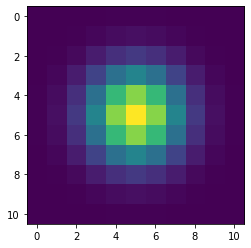

In [13]:
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()

gaussian_kernel_array = gaussian_kernel(5)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array)
plt.show()

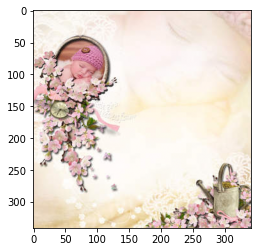

In [15]:
img = img_as_float(io.imread("/content/diary.jpg"))
plt.imshow(img)

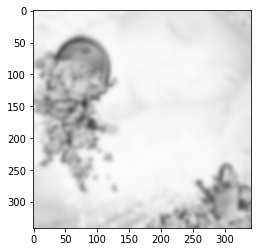

In [14]:
#Need to convert to float as we will be doing math on the array

from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imshow(gaussian_img)

The Median filter is a non-linear filter that is most commonly used as a simple way to reduce noise in an image.

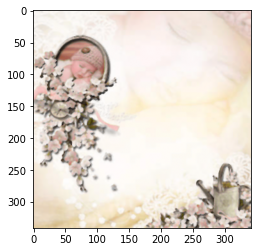

In [11]:
median_img = nd.median_filter(img, size=3)
plt.imshow(median_img)

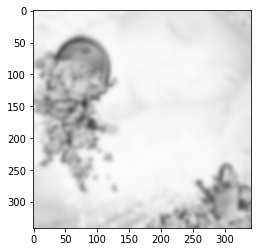

In [12]:
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imshow(gaussian_img)

#NLM

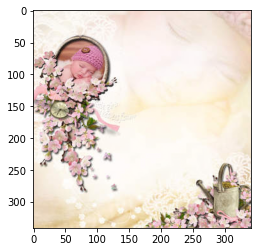

In [16]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

patch_kw = dict(patch_size=5,      
                patch_distance=3,  
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=True)
denoise_img_as_8byte = img_as_ubyte(denoise_img)

plt.imshow(denoise_img)